<a href="https://colab.research.google.com/github/dhanavadh/NLP_2024/blob/main/Sentiment_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis with Logistic Regression

In this activity, you will

- Explore the data to understand the dataset

- We want to know what keyword with positive sentiment (5 star reviews) and neutral sentiment (3 star reviews) and negative sentiment (1 star reviews)

- We also want to know where the model falls short. Analyze the errors that your model makes


** Steps

1) Download data
2) Open
	- How many rows?
	- How many columns? What are they?
3) Preprocess
	- Label 1 star --> negative 3 -->neutral  5--> positive
	- Discard 2 and 4 star reviews
4) Split train test (Think how many)
5) Make feature vector (vectorize -- CountVectorizer)
6) Train logistic regression on training set
7) Evaluate on test set
8) Predict on test set and add a column to test set
     | text | gold standard label | predicted label |
     |------|---------------------|-----------------|
9) Save to Excel
10) Open the prediction file in Excel and find error patterns

In [1]:
!gdown --id 1UpSJkqHhU7RMQC47Ii-6VZuByPYfhLrj

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1UpSJkqHhU7RMQC47Ii-6VZuByPYfhLrj
To: /content/w_review_data.csv
100% 60.4M/60.4M [00:01<00:00, 39.0MB/s]


In [2]:
import numpy as np
import pandas as pd

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
!pip install pythainlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 20.6 MB/s eta 0:00:00


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
dataset = 'w_review_data.csv'

In [13]:
df = pd.read_csv(dataset, delimiter=";", header=None)

In [14]:
print(df.head())

                                                   0  1
0  ร้านอาหารใหญ่มากกกกกกก \nเลี้ยวเข้ามาเจอห้องน้...  3
1  อาหารที่นี่เป็นอาหารจีนแคะที่หากินยากในบ้านเรา...  4
2  ปอเปี๊ยะสด ทุกวันนี้รู้สึกว่าหากินยาก (ร้านที่...  3
3  รัานคัพเค้กในเมืองไทยมีไม่มาก หลายๆคนอาจจะสงสั...  5
4  อร่อย!!! เดินผ่านDigital gatewayทุกวัน ไม่ยักร...  5


In [15]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 40000, Columns: 2


In [16]:
print(df.columns)

Index([0, 1], dtype='int64')


In [17]:
df.columns = ["text", "stars"]

In [18]:
print(df.head())

                                                text  stars
0  ร้านอาหารใหญ่มากกกกกกก \nเลี้ยวเข้ามาเจอห้องน้...      3
1  อาหารที่นี่เป็นอาหารจีนแคะที่หากินยากในบ้านเรา...      4
2  ปอเปี๊ยะสด ทุกวันนี้รู้สึกว่าหากินยาก (ร้านที่...      3
3  รัานคัพเค้กในเมืองไทยมีไม่มาก หลายๆคนอาจจะสงสั...      5
4  อร่อย!!! เดินผ่านDigital gatewayทุกวัน ไม่ยักร...      5


In [19]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 40000, Columns: 2


In [20]:
sentiment_map = {1: 'negative', 3: 'neutral', 5: 'positive'}

In [21]:
df = df[df["stars"].isin(sentiment_map.keys())]

In [22]:
df["label"] = df["stars"].map(sentiment_map)

In [28]:
from pythainlp.tokenize import word_tokenize

In [38]:
def thai_tokenizer(text):
    return " ".join(word_tokenize(str(text), keep_whitespace=False))  # Join tokens with space

df["tokenized_text"] = df["text"].apply(thai_tokenizer)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df["tokenized_text"], df["label"], test_size=0.2, random_state=42, stratify=df["label"])

In [40]:
vectorizer = CountVectorizer(stop_words=None)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [41]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [42]:
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.42      0.29      0.34        83
     neutral       0.80      0.82      0.81      2434
    positive       0.69      0.66      0.68      1360

    accuracy                           0.76      3877
   macro avg       0.64      0.59      0.61      3877
weighted avg       0.75      0.76      0.75      3877



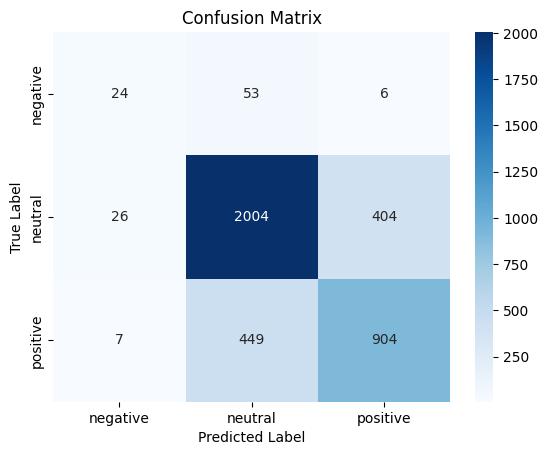

In [45]:
cm = confusion_matrix(y_test, y_pred, labels=["negative", "neutral", "positive"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["negative", "neutral", "positive"], yticklabels=["negative", "neutral", "positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [46]:
df_test = X_test.to_frame()
df_test["gold_standard_label"] = y_test
df_test["predicted_label"] = y_pred